# Практика

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw
import seaborn as sns

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [69]:
# в качестве примера я взял распределение ncf
dfn, dfd, nc = 27, 27, 0.416
ncf_rv = sts.ncf(dfn, dfd, nc)
sample = ncf_rv.rvs(100)
sample

array([1.65038985, 0.80570297, 1.7360689 , 0.73447489, 1.29708396,
       0.99456862, 1.35880671, 0.69294815, 1.81817593, 1.82240388,
       0.78012352, 0.60166326, 0.8896407 , 0.60647041, 0.86719498,
       1.27257393, 1.261732  , 1.09136963, 0.45243804, 0.72394417,
       1.99408325, 0.74781387, 0.55038628, 0.87790808, 1.27990038,
       1.19874309, 0.71222749, 2.21758903, 1.56958683, 0.44595938,
       1.02015463, 0.82804502, 0.85763193, 0.53526628, 0.68477519,
       0.86594632, 0.59253926, 1.36635149, 1.74511439, 1.22844601,
       1.64374267, 1.20867886, 1.02732988, 0.80858173, 1.50053597,
       0.62104682, 1.76087707, 2.85326928, 1.14264487, 0.91628725,
       1.27016079, 0.73660095, 1.62492407, 0.57253836, 0.89033279,
       1.22716652, 0.90927995, 0.78332693, 0.73045642, 1.37143928,
       1.25515636, 1.10790049, 1.73943479, 1.94362938, 2.12976991,
       1.15661563, 0.506313  , 1.00809849, 0.46948855, 2.2390176 ,
       0.88760631, 0.78959709, 1.5850703 , 1.29769408, 0.89776

In [70]:
sample.dtype

dtype('float64')

In [71]:
real_mean = ncf_rv.mean() # настоящее среднее случайной величины
real_mean

1.09664

In [72]:
real_var = ncf_rv.var() # настоящая дисперсия случайной величины
real_var

0.20138254692173915

### Постройте гистограмму выборки и теоретическую плотность распределения

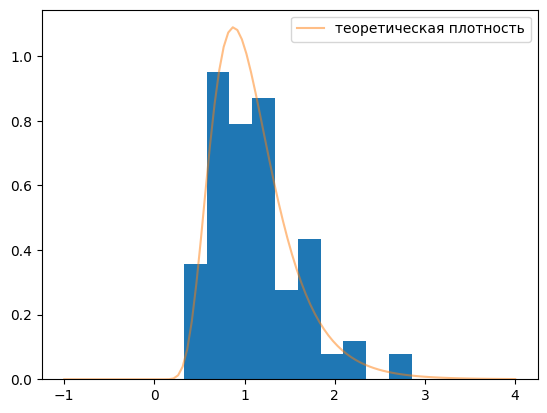

In [73]:
# мой код тут
plt.hist(sample, density=True)
x = np.linspace(-1,4,100)
pdf = ncf_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [74]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.1231252886807512
0.23810773055517384


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

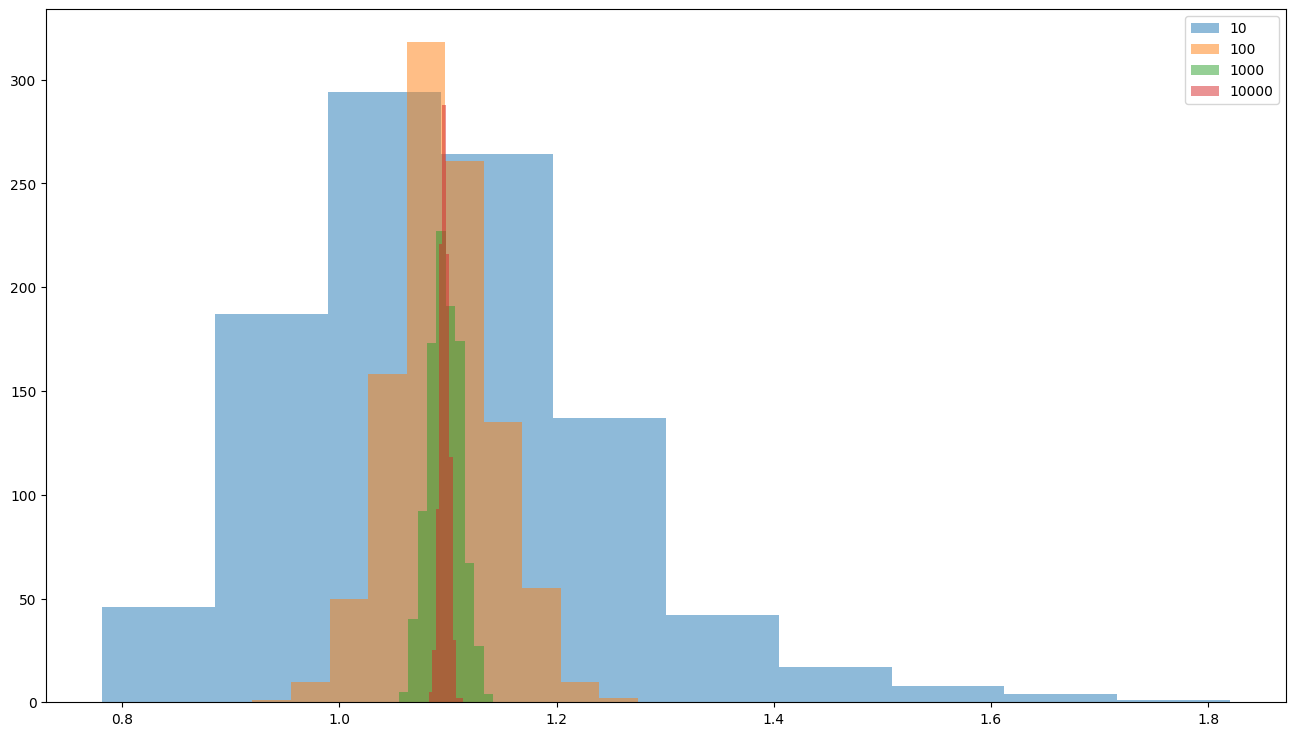

In [76]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(ncf_rv.rvs(N)))
    plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
Апроксимация распределения выборочного среднего работает хорошо

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [77]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DA/Lesson_12/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [78]:
# выедлим в отдельный датафрейм столбцы total day calls и churn
tdc_df = df[['total day calls', 'churn' ]]
tdc_df

,total day calls,churn
0,110,False
1,123,False
2,114,False
3,71,False
4,113,False
...,...,...
3328,77,False
3329,57,False
3330,109,False
3331,105,False


In [79]:
# среднее значение по total_day_calls
tdc_means = tdc_df.groupby('churn')['total day calls'].mean()
tdc_means

churn
False    100.283158
True     101.335404
Name: total day calls, dtype: float64

In [80]:
# дисперсия
tdc_variance = tdc_df.groupby('churn')['total day calls'].var(ddof=1)
tdc_variance

churn
False    392.085817
True     465.795985
Name: total day calls, dtype: float64

In [81]:
# стандартное отклонение
tdc_std = tdc_df.groupby('churn')['total day calls'].std()
tdc_std

churn
False    19.801157
True     21.582307
Name: total day calls, dtype: float64

In [82]:
# кол-во значений
tdc_count = tdc_df.groupby('churn')['total day calls'].count()
tdc_count

churn
False    2850
True      483
Name: total day calls, dtype: int64

In [83]:
# Доверительный интервал для среднего по цпт, если нам известна дисперсия
a = np.mean(tdc_df, axis=0) - 1.96 * tdc_df.std() / np.sqrt(3333-1), np.mean(tdc_df, axis=0) + 1.96 * tdc_df.std() / np.sqrt(3333-1) 
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия")
print(f"Значение False: дов. инт.: {a[0][0]}, станд. откл.: {a[0][1]}")
print(f"Значение True: дов. инт.: {a[1][0]}, станд. откл.: {a[1][1]}")
print('-'*80)

# Доверительный интервал для среднего по цпт интервальная оценка
b = sts.norm.interval(confidence=0.95, loc=np.mean(tdc_df, axis=0), scale=np.std(tdc_df, ddof=1)/np.sqrt(3333-1))
print("Доверительный интервал для среднего по цпт интервальная оценка")
print(f"Значение False: дов. инт.: {b[0][0]}, станд. откл.: {b[0][1]}")
print(f"Значение True: дов. инт.: {b[1][0]}, станд. откл.: {b[1][1]}")
print('-'*80)

# Доверительный интервал для среднего по цпт методом _zconfint_generic
c = ssw._zconfint_generic(np.mean(tdc_df, axis=0),  np.std(tdc_df, ddof=1), alpha=0.95, alternative='two-sided')
print("Доверительный интервал для среднего по цпт методом _zconfint_generic")
print(f"Значение False: дов. инт.: {c[0][0]}, станд. откл.: {c[0][1]}")
print(f"Значение True: дов. инт.: {c[1][0]}, станд. откл.: {c[1][1]}") 

Доверительный интервал для среднего по цпт, если нам известна дисперсия
Значение False: дов. инт.: 99.75419806085901, станд. откл.: 0.1329600464790397
Значение True: дов. инт.: 101.11708906785387, станд. откл.: 0.15686893641925015
--------------------------------------------------------------------------------
Доверительный интервал для среднего по цпт интервальная оценка
Значение False: дов. инт.: 99.75421058258004, станд. откл.: 0.13296026614477133
Значение True: дов. инт.: 101.11707654613284, станд. откл.: 0.15686871675351852
--------------------------------------------------------------------------------
Доверительный интервал для среднего по цпт методом _zconfint_generic
Значение False: дов. инт.: 99.17717595744556, станд. откл.: 0.12283747769490745
Значение True: дов. инт.: 101.69411117126732, станд. откл.: 0.1669915052033824


In [84]:
# Добавим наши данные по доверительным интервалам в один датафрейм
data1 = {'a_False': [a[0][0] - a[0][1], a[0][0] + a[0][1]],
        'a_True': [a[1][0] - a[1][1], a[1][0] + a[1][1]],
        'b_False': [b[0][0] - b[0][1], b[0][0] + b[0][1]],
        'b_True': [b[1][0] - b[1][1], b[1][0] + b[1][1]],
        'c_False': [c[0][0] - c[0][1], c[0][0] + c[0][1]],
        'c_True': [c[1][0] - c[1][1], c[1][0] + c[1][1]]} 
df1 = pd.DataFrame(data1) 
df1

,a_False,a_True,b_False,b_True,c_False,c_True
0,99.621238,100.960220,99.621250,100.960208,99.054338,101.527120
1,99.887158,101.273958,99.887171,101.273945,99.300013,101.861103


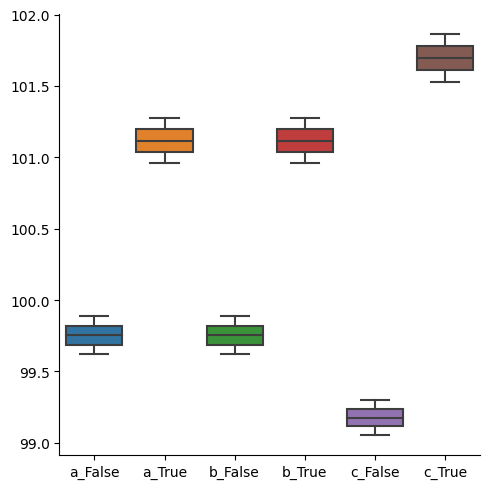

In [85]:
# Построим график с доверительными интервалами по датафрейму
sns.catplot(kind='box', data=df1)

По значениям и на графике видно, что доверительные интервалы, рассчитанные по цпт, если нам известна дисперсия, и по цпт интервальная оценка практически идентичны, в то время как, доверительные интервалы, рассчитанные по цпт методом _zconfint_generic значительно отличаются.